# Mass Shootings in the USA

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mother Jones' Investigation_ US Mass Shootings, 1982-2017 - US mass shootings.csv", parse_dates=['Date'])
df = df.set_index('Date')
df['Race'] = df['Race'].apply(lambda x: x.strip().capitalize()if type(x)==str else 'Unkown')
df.head(2)

,Case,Location,Year,Summary,Fatalities,Injured,Total victims,Venue,Prior signs of mental health issues,Mental health - details,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-14,Rancho Tehama shooting spree,"Rancho Tehama, CA",2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,TBD,NaN,...,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,https://www.nbcnews.com/news/us-news/californi...,NaN,NaN,NaN,Spree
2017-11-05,Texas First Baptist Church massacre,"Sutherland Springs, TX",2017,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46+,Religious,Yes,"Kelley had a history of domestic violence, inc...",...,Purchased in April 2016 from an Academy Sports...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,M,https://www.washingtonpost.com/news/morning-mi...,http://www.expressnews.com/news/local/article/...,32.780105,-96.800008,Mass


In [3]:
pattern = re.compile('[0-9]+')

for column in ['Fatalities', 'Injured', 'Total victims']:
    df[column] = df[column].apply(lambda x: int(pattern.search(x)[0]))

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2017-11-14 to 1982-08-20
Data columns (total 21 columns):
Case                                   95 non-null object
Location                               95 non-null object
Year                                   95 non-null int64
Summary                                95 non-null object
Fatalities                             95 non-null int64
Injured                                95 non-null int64
Total victims                          95 non-null int64
Venue                                  95 non-null object
Prior signs of mental health issues    95 non-null object
Mental health - details                85 non-null object
Weapons obtained legally               95 non-null object
Where obtained                         83 non-null object
Type of weapons                        94 non-null object
Weapon details                         90 non-null object
Race                                   95 non-null object
Gender     

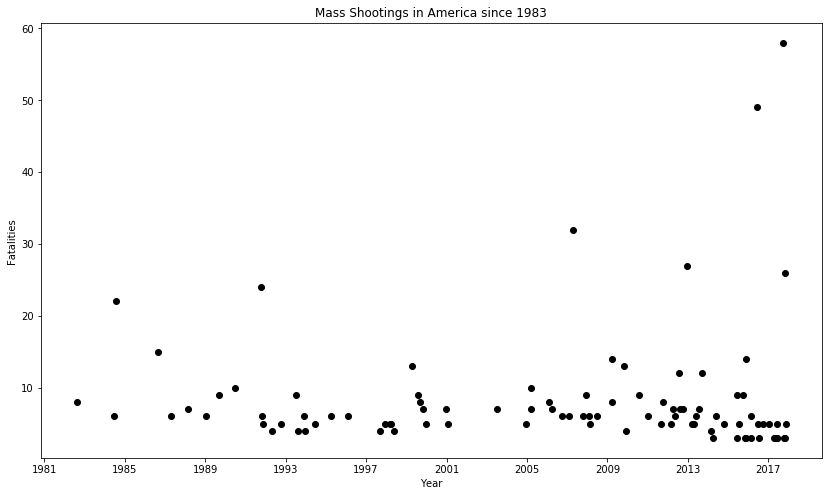

In [4]:
plt.figure(figsize=(14, 8))
plt.scatter(df.index, df['Fatalities'], c='k')
plt.title('Mass Shootings in America since 1983')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.show()

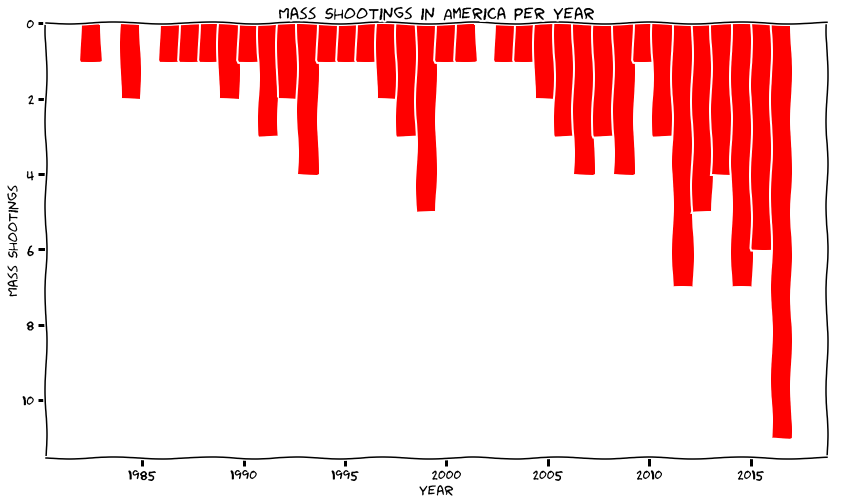

In [5]:
plt.xkcd()
plt.figure(figsize=(14, 8))
df['Year'].hist(bins=df['Year'].max()-df['Year'].min()+1, color='red')
plt.title('Mass Shootings in America per Year')
plt.xlabel('Year')
plt.ylabel('Mass Shootings')
plt.gca().invert_yaxis()
plt.grid('off')
plt.show()

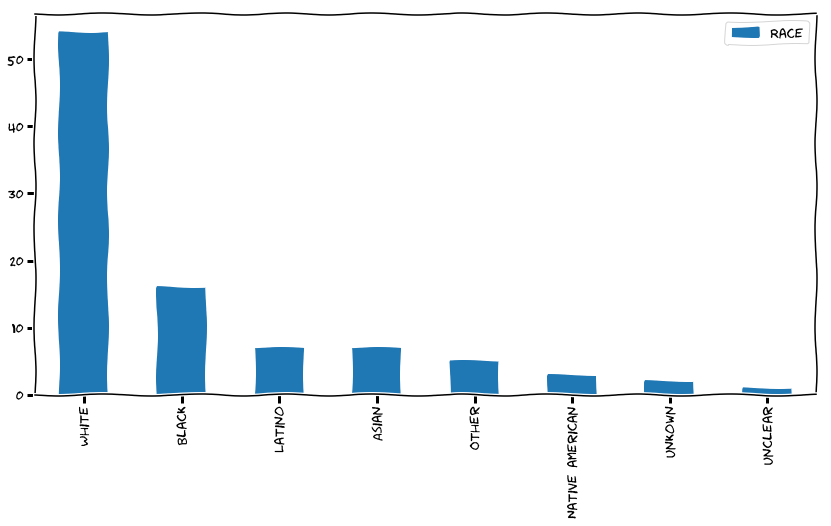

In [6]:
df['Race'].value_counts().to_frame().plot(kind='bar', figsize=(14,7))
plt.show()